In [69]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [70]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


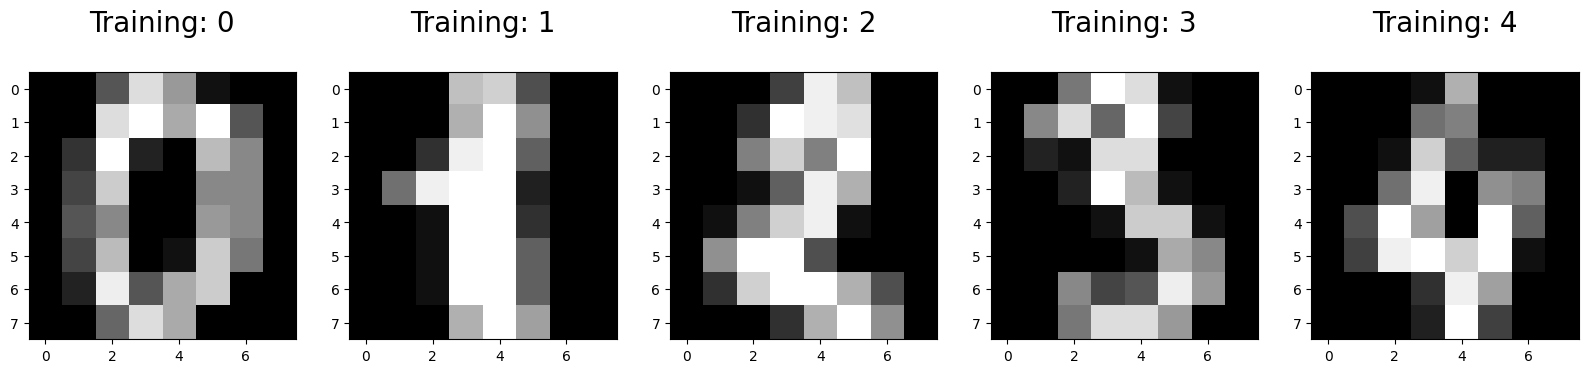

In [71]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [72]:
# Extract data and target
X, y = digits.data, digits.target

In [73]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We are splitting the data into training and test sets so the machine can learn from the training data to recgnise patterns, relationshps and correlatons in the data to see if it performs well on unseen data (the test data).

Random forest classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
print(clf)

RandomForestClassifier()


In [75]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
from sklearn.metrics import accuracy_score

preds = clf.predict(X_test)

In [77]:
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.9722222222222222


In [78]:
# Reshape the images to 2D arrays
X = X.reshape(-1, 8, 8)

Tuning max depth

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50]  
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(f"Best max_depth: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best max_depth: {'max_depth': 10}
Best score: 0.9763


I decided to tune max_depth as the model was very accurate on the training data and therefore could be overfitting the data

In [80]:
# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


I decided to use 30 as the max depth as any larger could lead to overfitting and less could lead to underfitting

Cofusion matrix

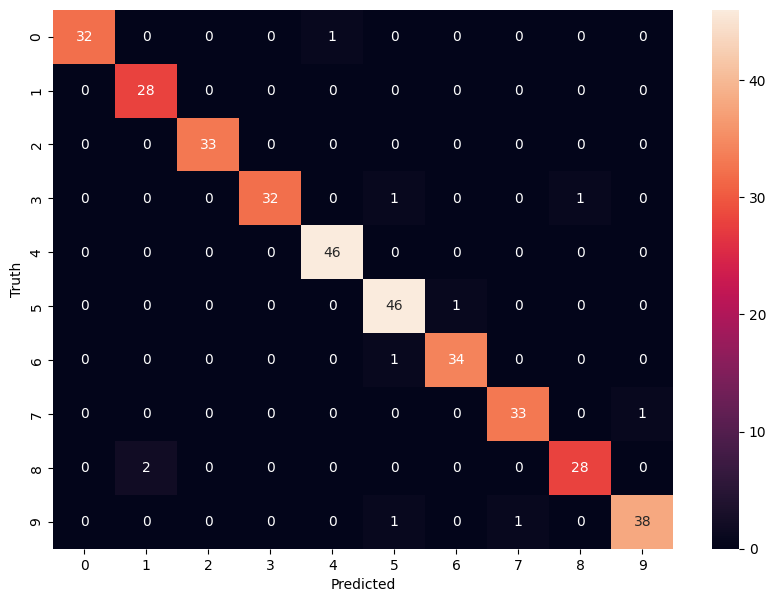

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Which classes the model struggles with the most? It seems to struggle the most with classes 5, 8 and 9 as there are 2 incorrectly predicted values for these but 1 or less for the other classes.

Finding the accuracy, precision, recall and f1_score

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='macro'):.4f}")

Accuracy: 0.9778
Precision: 0.9776
Recall: 0.9775
F1-score: 0.9772
